In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("/home/rguktrkvalley/Downloads/VideoDownloader/Practice/PROJECT/Real_Estate_Price_Prediction/bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
#here we need only necessary columns unrelated or unimportant columns aren't necessary area_type,availability,society,balcony
df2=df.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [4]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2=df2.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [35]:
df2.columns=['loc','bhk','total_sqft','bath','price']
df2

,loc,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [7]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [36]:
def is_float(x):
    try:
        float(x)
    except:
         return False
    return True
# here I wrriten this to show the non float values like ranges
df2[~df2['total_sqft'].apply(is_float)].head(10)

,loc,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [37]:
def convert_sqft(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft)
df3

,loc,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [38]:
df3.loc[30]

loc           Yelahanka
bhk                   4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [39]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [40]:
df4=df3.copy()
df4

,loc,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [41]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [42]:
len(df4['loc'].unique())
#total we have 1304 unique locations

1304

In [43]:
df4['loc'].apply(lambda x: x.strip())
df4

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [44]:
len(df4['loc'].unique())

1304

In [45]:
loc_stats=df4.groupby('loc')['loc'].agg('count').sort_values(ascending=False)
loc_stats

loc
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: loc, Length: 1304, dtype: int64

In [46]:
len(loc_stats[loc_stats<=10])

1063

In [47]:
len(loc_stats)

1304

In [48]:
loc_less_than_ten=loc_stats[loc_stats<=10]
loc_less_than_ten

loc
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: loc, Length: 1063, dtype: int64

In [49]:
df4['loc']=df4['loc'].apply(lambda x: 'other' if x in loc_less_than_ten else x)
df4
#here now the least count loc columns are repleced by the name other

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [50]:
df4['loc'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Yeshwant

In [51]:
len(df4['loc'].unique())

242

In [52]:
df4

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [54]:
df4[df4['total_sqft']/df4.bhk<300]

,loc,bhk,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,other,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [55]:
#here there are some outliers we are removing the house which have small space but having many rooms
df5=df4[~(df4['total_sqft']/df4.bhk<300)]
df5

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('loc'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6=remove_pps_outliers(df5)
df6

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.00,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.00,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.00,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.00,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.00,4561.403509
...,...,...,...,...,...,...
10239,other,2,1353.0,2.0,110.00,8130.081301
10240,other,1,812.0,1.0,26.00,3201.970443
10241,other,3,1440.0,2.0,63.93,4439.583333
10242,other,2,1075.0,2.0,48.00,4465.116279


In [62]:
df6['price'].describe()

count    10244.000000
mean        90.968580
std         86.139083
min         10.000000
25%         49.000000
50%         67.000000
75%        100.000000
max       2200.000000
Name: price, dtype: float64

In [ ]:
df6['total_sqft'].describe()

In [70]:
df6['loc'].unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

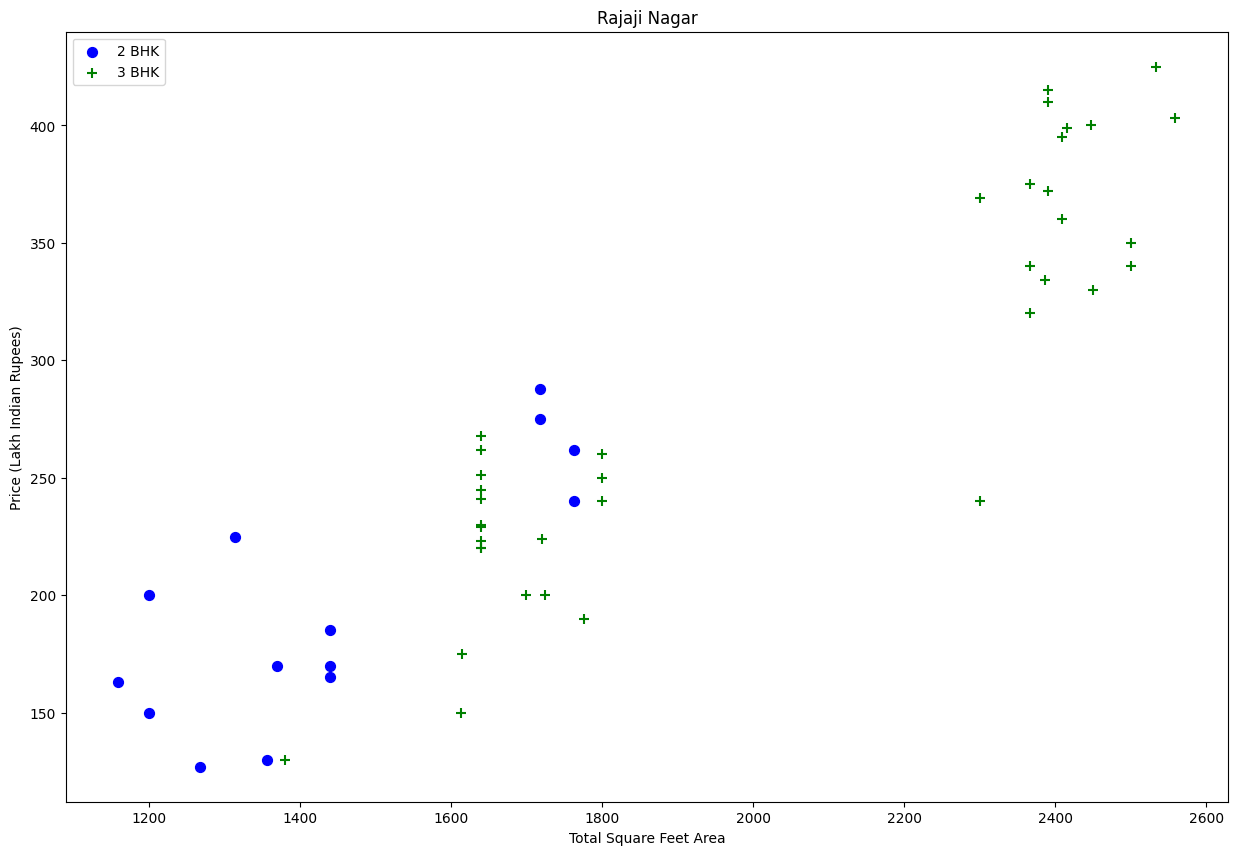

In [92]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df['loc']==location) & (df.bhk==2)]
    bhk3 = df[(df['loc']==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.xscale('linear')  # Set X-axis to linear scale
    plt.yscale('linear')  # Set Y-axis to linear scale
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show
    
plot_scatter_chart(df6,'Rajaji Nagar')

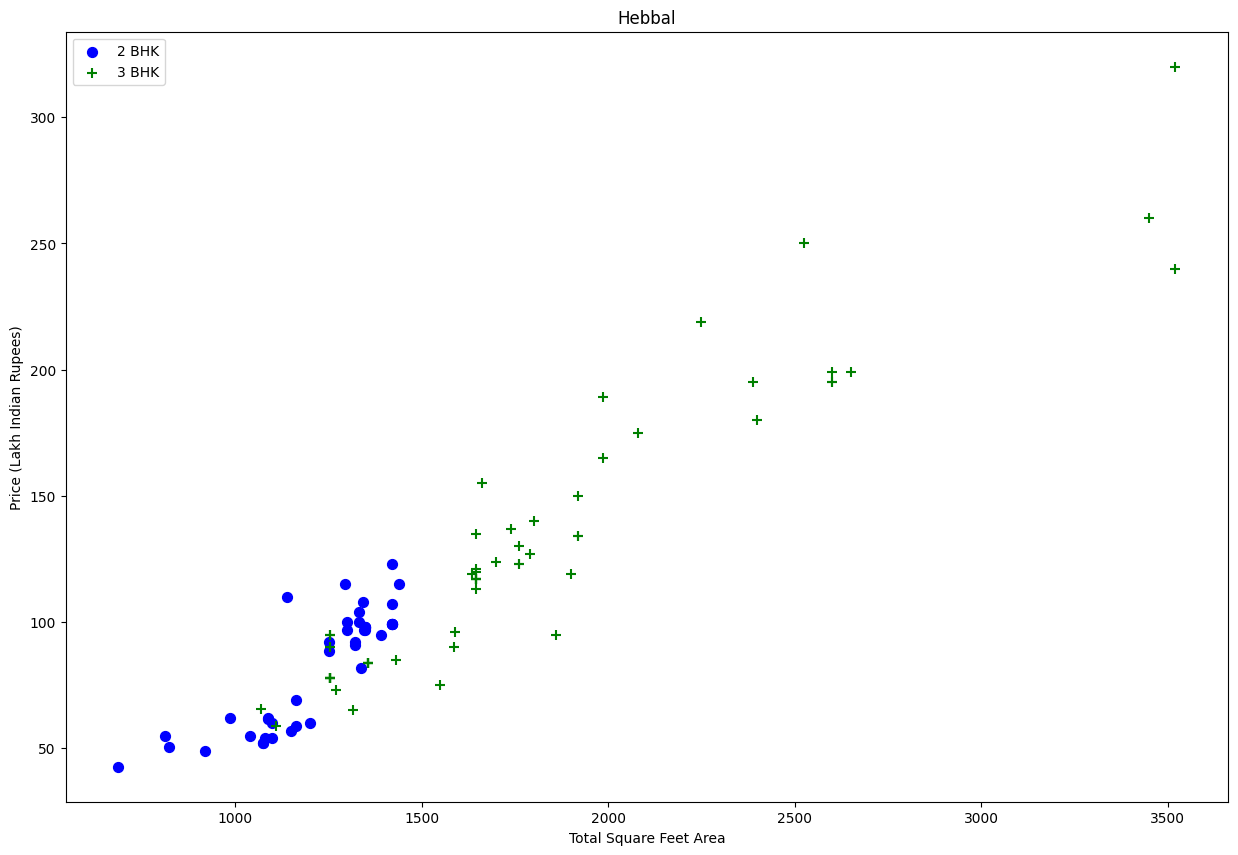

In [93]:
plot_scatter_chart(df6,'Hebbal')

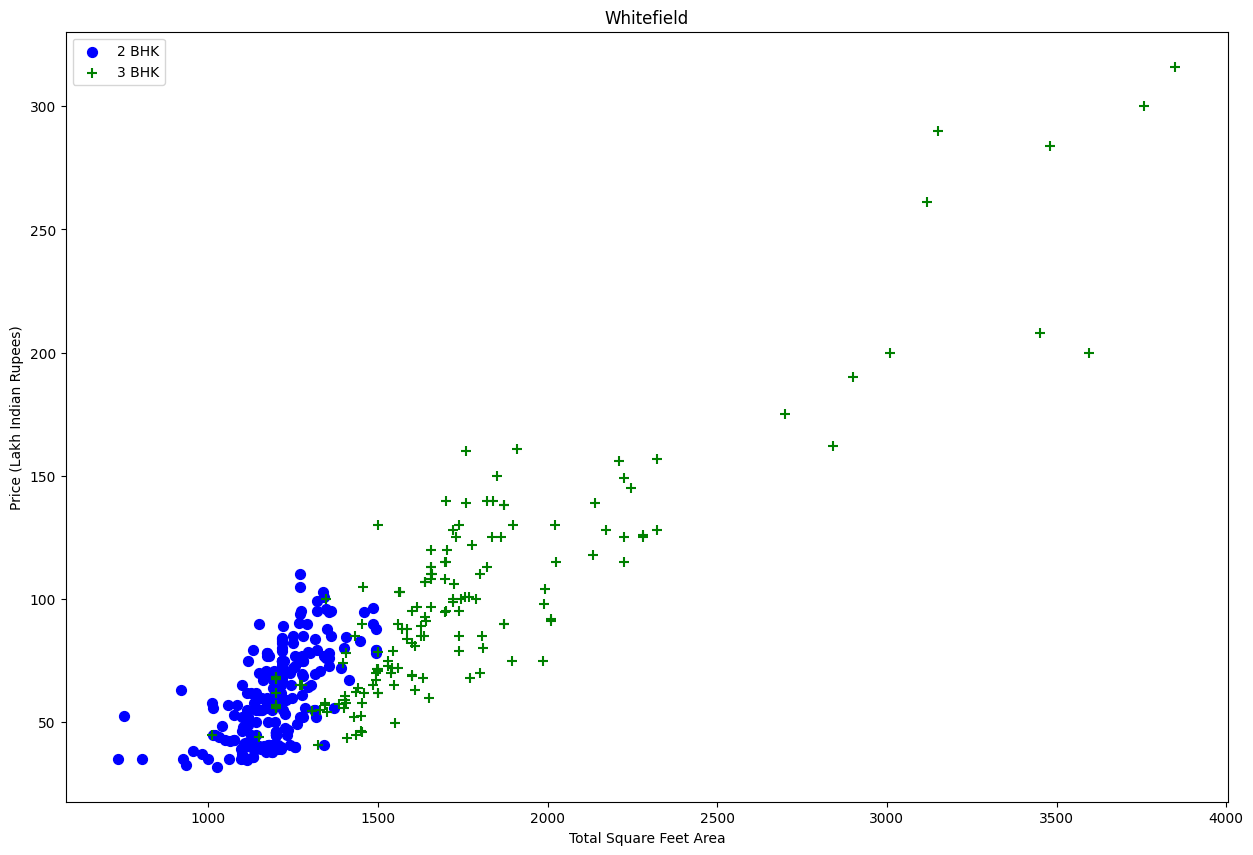

In [94]:
plot_scatter_chart(df6,'Whitefield')

In [95]:
df6

,loc,bhk,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.00,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.00,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.00,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.00,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.00,4561.403509
...,...,...,...,...,...,...
10239,other,2,1353.0,2.0,110.00,8130.081301
10240,other,1,812.0,1.0,26.00,3201.970443
10241,other,3,1440.0,2.0,63.93,4439.583333
10242,other,2,1075.0,2.0,48.00,4465.116279


In [98]:
def remove_outliers_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('loc'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7=remove_outliers_bhk(df6)
df7.shape

(7342, 6)

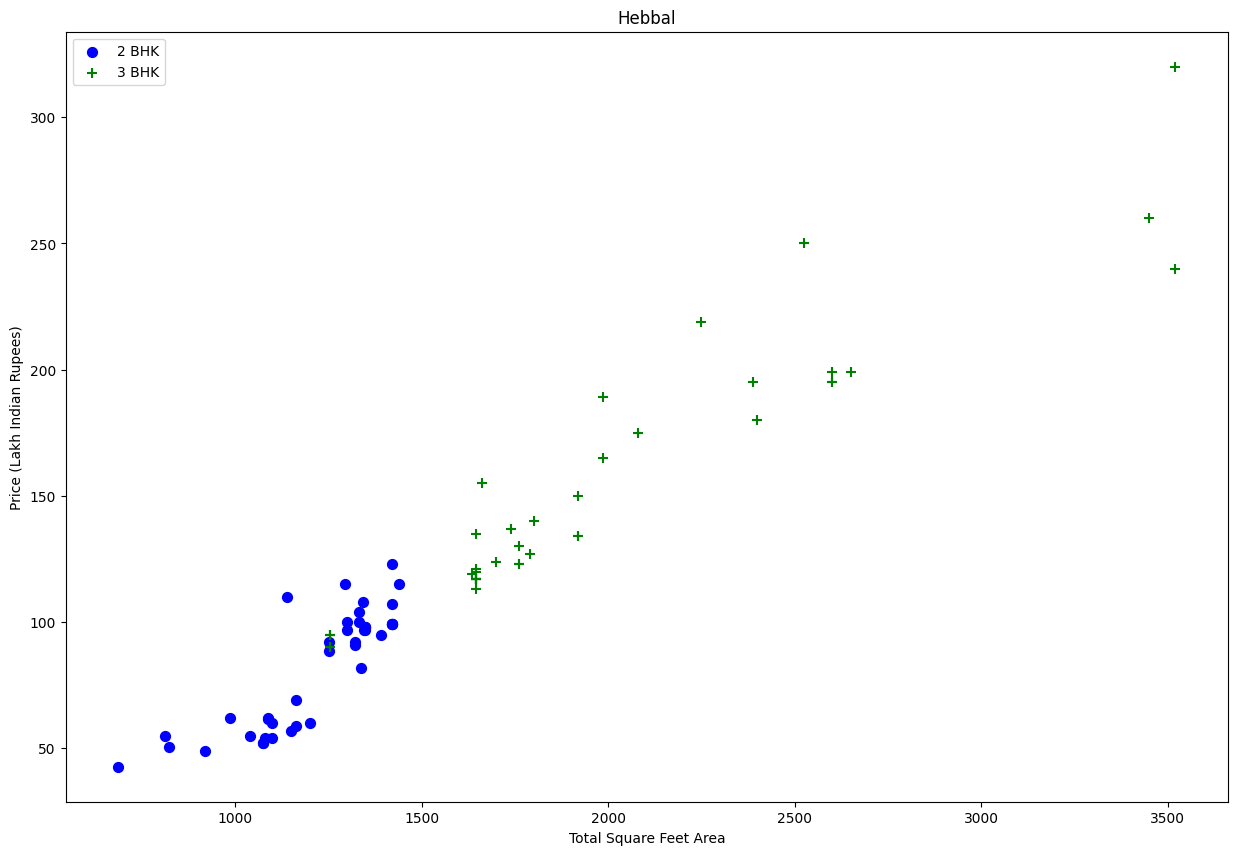

In [102]:
plot_scatter_chart(df7,'Hebbal')

In [103]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [105]:
df7[df7['bath']>10]

,loc,bhk,total_sqft,bath,price,price_per_sqft
5271,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8481,other,10,12000.0,12.0,525.0,4375.000000
8570,other,16,10000.0,16.0,550.0,5500.000000
9309,other,11,6000.0,12.0,150.0,2500.000000
9641,other,13,5425.0,13.0,275.0,5069.124424


In [106]:
df8=df7[df7['bath']<df7.bhk+2]
df8.shape

(7264, 6)

In [108]:
df8

,loc,bhk,total_sqft,bath,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
...,...,...,...,...,...,...
10235,other,2,1200.0,2.0,70.0,5833.333333
10236,other,1,1800.0,1.0,200.0,11111.111111
10239,other,2,1353.0,2.0,110.0,8130.081301
10240,other,1,812.0,1.0,26.0,3201.970443


In [115]:
df9=df8.drop(['price_per_sqft'],axis='columns')
df9
#now the data is cleaned and ready for training

,loc,bhk,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,65.0
5,Devarachikkanahalli,2,947.0,2.0,43.0
...,...,...,...,...,...
10235,other,2,1200.0,2.0,70.0
10236,other,1,1800.0,1.0,200.0
10239,other,2,1353.0,2.0,110.0
10240,other,1,812.0,1.0,26.0


In [117]:
#MODEL BUILDING
dummies=pd.get_dummies(df9['loc'],dtype=int)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
df10=pd.concat([df9.drop(['loc'],axis='columns'),dummies.drop(['other'],axis='columns')],axis='columns')
df10

,bhk,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
x=df10.drop(['price'],axis='columns')
y=df10['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [126]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8536201722431405

In [132]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_scale,y)

,model,best_score,best_params
0,linear_regression,0.845404,{}
1,lasso,0.818265,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.682410,"{'criterion': 'squared_error', 'splitter': 'be..."


In [147]:
def predict_price(location,total_sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    x_input = np.zeros(len(x.columns))
    x_input[0] = bhk
    x_input[1] = total_sqft
    x_input[2] = bath
    if loc_index >= 0:
        x_input[loc_index] = 1

    return lr.predict([x_input])[0]
predict_price('Indira Nagar',1000,2,2)

/home/rguktrkvalley/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


164.87166492150146

In [148]:
import pickle
with open('banglore_home_price_prediction.pickle','wb') as f:
    pickle.dump(lr,f)

In [149]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))